In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('Iris.csv')
print(set(data['Species']))

{'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'}


In [ ]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

data['Species'] = lc.fit_transform(data['Species'])


In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[: -1].values

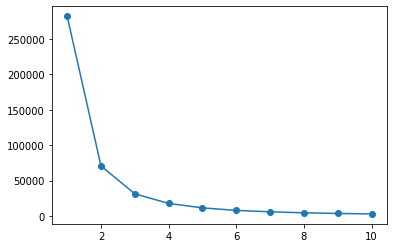

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
print(kmeans.cluster_centers_)

[[ 25.5     5.006   3.418   1.464   0.244]
 [125.5     6.588   2.974   5.552   2.026]
 [ 75.5     5.936   2.77    4.26    1.326]]


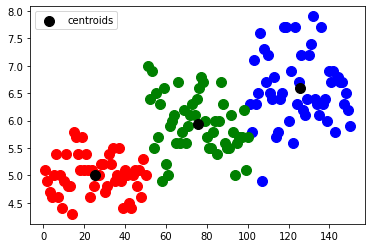

In [ ]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='centroids')

plt.legend()
plt.show()

In [ ]:
print(kmeans.predict([[151, 5.9, 2.8, 2.4, 2.8]]))

[1]
